In [ ]:
#!pip install mysql-connector-python

In [ ]:
!pip install pymysql

In [97]:
import pymysql

pymysql.__version__

'1.0.2'

In [98]:
import mysql.connector as sql


In [99]:
try:
    db_connection = sql.connect(host='cpanel.insaid.co', database='Capstone2', user='student', password='student')
    db_cursor = db_connection.cursor()
except (Exception, sql.Error) as error :
  print("Error while connecting to MySQL", error)

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display

pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

department_data
This dataset contains information about each department. The schema of the dataset is as follows:

dept_id – Unique Department Code
dept_name – Name of the Department
dept_head – Name of the Head of the Department

employee_details_data
This dataset consists of Employee ID, their Age, Gender and Marital Status. The schema of this dataset is as follows:

employee_id – Unique ID Number for each employee
age – Age of the employee
gender – Gender of the employee
marital_status – Marital Status of the employee

In [101]:
department_data = pd.read_sql("SELECT * FROM department_data",con=db_connection)
department_data.head()

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray


In [102]:
employee_details_data = pd.read_sql("SELECT * FROM employee_details_data",con=db_connection)
employee_details_data.head()

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married


In [103]:
#db_cursor.execute('SELECT * FROM department_data')

#table_rows = db_cursor.fetchall()

#df_department_data = pd.DataFrame(table_rows,columns=['dept_id','dept_name', 'dept_head'])
#df_department_data.head()

### Department Data

In [104]:
department_data.shape

(11, 3)

In [105]:
department_data

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray
5,D00-FN,Finance,Aanchal J
6,D00-PR,Procurement,Louie Viles
7,D00-AD,Admin,Evelyn Tolson
8,D00-MN,Management,Ellie Trafton
9,D00-MT,Marketing,Reuben Swann


In [106]:
department_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dept_id    11 non-null     object
 1   dept_name  11 non-null     object
 2   dept_head  11 non-null     object
dtypes: object(3)
memory usage: 392.0+ bytes


#### Inference 

department_data 
- contains 11 rows 
- each row is unique with 1:1 relationship.
- there are no null values
- all features are object

### Employee Details Data 

In [107]:
employee_details_data.shape

(14245, 4)

In [108]:
employee_details_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     14245 non-null  int64 
 1   age             14245 non-null  int64 
 2   gender          14245 non-null  object
 3   marital_status  14245 non-null  object
dtypes: int64(2), object(2)
memory usage: 445.3+ KB


In [109]:
len(employee_details_data.employee_id.unique())

14245

In [110]:
employee_details_data.describe (include='all')

,employee_id,age,gender,marital_status
count,14245.00,14245.00,14245,14245
unique,NaN,NaN,2,2
top,NaN,NaN,Male,Unmarried
freq,NaN,NaN,9382,7283
mean,112123.05,32.89,NaN,NaN
std,8500.46,9.97,NaN,NaN
min,100101.00,22.00,NaN,NaN
25%,105775.00,24.00,NaN,NaN
50%,111298.00,29.00,NaN,NaN
75%,116658.00,41.00,NaN,NaN


In [111]:
employee_details_data.marital_status.value_counts(normalize=True)

Unmarried   0.51
Married     0.49
Name: marital_status, dtype: float64

In [112]:
employee_details_data.age.value_counts(normalize=True, bins=5)

(21.964, 29.0]   0.53
(36.0, 43.0]     0.14
(29.0, 36.0]     0.13
(43.0, 50.0]     0.13
(50.0, 57.0]     0.07
Name: age, dtype: float64

<AxesSubplot:ylabel='Density'>

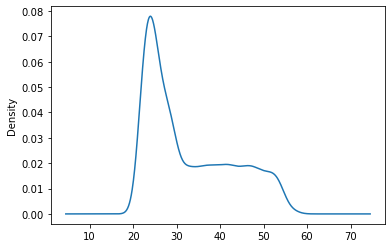

In [113]:
employee_details_data.age.plot(kind='kde')

In [114]:
employee_details_data.gender.value_counts(normalize=True)

Male     0.66
Female   0.34
Name: gender, dtype: float64

#### Inferences 

employee_details_data 
- has 14245 rows with unique employee id
- mean age is 32 years with min of 22 yrs and max of 57 years
- 51% of the employees are unmarried
- 66% of the employees are male
- 53% of the employees are in the age bracket of 22-29 yrs
- 7% of employees are in the age group of 50-57 years

### Employee Data

employee_data
This dataset consists of each employee’s Administrative Information, Workload Information, Mutual Evaluation Information and Status.

Target variable

status – Current employment status (Employed / Left)

Administrative information

department – Department to which the employees belong(ed) to
salary – Salary level with respect to rest of their department
tenure – Number of years at the company
recently_promoted – Was the employee promoted in the last 3 years?
employee_id – Unique ID Number for each employee

Workload information

n_projects – Number of projects employee has worked on
avg_monthly_hrs – Average number of hours worked per month

Mutual evaluation information

satisfaction – Score for employee’s satisfaction with the company (higher is better)
last_evaluation – Score for most recent evaluation of employee (higher is better)
filed_complaint – Has the employee filed a formal complaint in the last 3 years?

In [115]:
#db_cursor.execute('SELECT * FROM employee_data')

#table_rows = db_cursor.fetchall()

#df_employee_data = pd.DataFrame(table_rows,columns=['salary',
#                                                    'department','recently_promoted',
#                                                    'avg_monthly_hrs','tenure',
#                                                    'filed_complaint','satisfaction','last_evaluation','status','n_projects','employee_id'
#                                                    ])
#df_employee_data

In [116]:
employee_data = pd.read_sql("SELECT * FROM employee_data",con=db_connection)
employee_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.00,None,NaN,0.87,6,NaN,medium,0.13,Left,4.00,124467
1,134.00,None,NaN,0.56,2,NaN,low,0.51,Left,3.00,112210
2,156.00,D00-SS,1.00,0.47,2,NaN,medium,0.41,Left,3.00,126150
3,256.00,D00-SP,NaN,0.96,6,NaN,low,0.15,Left,4.00,125346
4,146.00,D00-SS,NaN,0.51,2,NaN,medium,0.43,Left,3.00,113707


In [117]:
#closing database connection.
'''if(db_connection):
    db_cursor.close()
    db_connection.close()
    print("MySQL connection is closed")'''

'if(db_connection):\n    db_cursor.close()\n    db_connection.close()\n    print("MySQL connection is closed")'

In [118]:
employee_data.shape

(14150, 11)

In [119]:
len(employee_data.employee_id.unique())

14117

In [120]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.2+ MB


In [121]:
employee_data.describe(include='all')

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
count,14150.00,13443,2046.00,12663.00,14150.00,297.00,14150,14000.00,14150,14000.00,14150.00
unique,NaN,12,NaN,NaN,NaN,NaN,3,NaN,2,NaN,NaN
top,NaN,D00-SS,NaN,NaN,NaN,NaN,low,NaN,Employed,NaN,NaN
freq,NaN,3905,NaN,NaN,NaN,NaN,6906,NaN,10784,NaN,NaN
mean,199.99,NaN,1.00,0.72,3.78,1.00,NaN,0.62,NaN,3.50,112080.75
std,50.83,NaN,0.00,0.17,1.25,0.00,NaN,0.25,NaN,1.46,8748.20
min,49.00,NaN,1.00,0.32,1.00,1.00,NaN,0.04,NaN,2.00,0.00
25%,155.00,NaN,1.00,0.56,3.00,1.00,NaN,0.45,NaN,3.00,105772.50
50%,199.00,NaN,1.00,0.72,4.00,1.00,NaN,0.65,NaN,3.00,111291.50
75%,245.00,NaN,1.00,0.87,5.00,1.00,NaN,0.82,NaN,4.00,116650.75


In [122]:
employee_data.avg_monthly_hrs.value_counts(normalize=True, bins=5)

(205.6, 257.8]    0.30
(153.4, 205.6]    0.29
(101.2, 153.4]    0.23
(257.8, 310.0]    0.16
(48.738, 101.2]   0.01
Name: avg_monthly_hrs, dtype: float64

<AxesSubplot:ylabel='Density'>

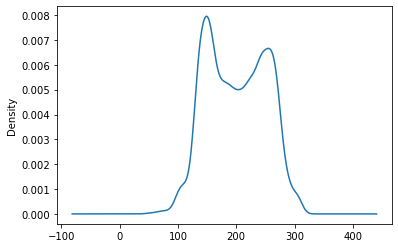

In [123]:
employee_data.avg_monthly_hrs.plot(kind='kde')

In [124]:
employee_data.department.value_counts(normalize=True)

D00-SS    0.29
D00-ENG   0.19
D00-SP    0.16
D00-IT    0.09
D00-PD    0.06
D00-MT    0.06
D00-FN    0.05
D00-MN    0.04
-IT       0.02
D00-AD    0.01
D00-PR    0.01
D00-TP    0.01
Name: department, dtype: float64

In [125]:
# need to correct the name of the -IT depatment to D00-IT
employee_data.replace('-IT', 'D00-IT', inplace=True)

In [126]:
#rename department to dept_id in sync with department_data
employee_data.rename(columns={"department":"dept_id"},inplace=True)

D00-SS     3905
D00-ENG    2575
D00-SP     2113
D00-IT     1364
D00-PD      855
D00-MT      815
D00-FN      725
D00-MN      593
D00-AD      175
D00-PR      173
D00-TP      150
Name: dept_id, dtype: int64

<AxesSubplot:>

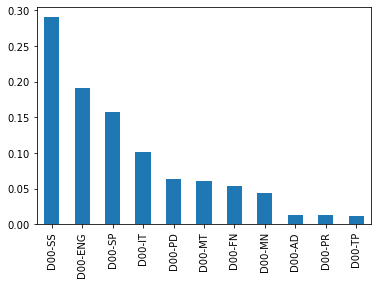

In [127]:
display(employee_data.dept_id.value_counts())
employee_data.dept_id.value_counts(normalize=True).plot(kind='bar')


<AxesSubplot:ylabel='Density'>

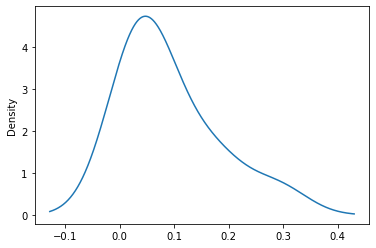

In [128]:
employee_data.dept_id.value_counts(normalize=True).plot(kind='kde')

In [129]:
#- replace missing depatment with D00-UNK
display(employee_data.dept_id.isna().sum())
employee_data[employee_data.dept_id.isna()]
employee_data.dept_id.fillna("D00-UNK", inplace=True)
display(employee_data.dept_id.isna().sum())


707

0

In [130]:
display(employee_data.dept_id.isna().sum())

0

In [131]:
employee_data.filed_complaint.value_counts()

1.00    2046
Name: filed_complaint, dtype: int64

In [132]:
employee_data.last_evaluation.value_counts(bins=4,normalize=True)

(0.829, 1.0]     0.30
(0.487, 0.658]   0.28
(0.658, 0.829]   0.24
(0.314, 0.487]   0.08
Name: last_evaluation, dtype: float64

In [133]:
employee_data.n_projects.value_counts(normalize=True)

4   0.29
3   0.27
5   0.18
2   0.16
6   0.08
7   0.02
1   0.00
Name: n_projects, dtype: float64

In [134]:
employee_data.recently_promoted.value_counts()

1.00    297
Name: recently_promoted, dtype: int64

In [135]:
employee_data.salary.value_counts(normalize=True)

low      0.49
medium   0.43
high     0.08
Name: salary, dtype: float64

In [136]:
employee_data.satisfaction.value_counts(normalize=True, bins=4)

(0.76, 1.0]      0.35
(0.52, 0.76]     0.32
(0.28, 0.52]     0.20
(0.0381, 0.28]   0.12
Name: satisfaction, dtype: float64

In [151]:
employee_data.satisfaction.unique()

array([0.134415, 0.511041, 0.405101, ..., 0.944942, 0.740136, 0.506658])

In [153]:
employee_data.satisfaction.isna().sum()

150

In [154]:
employee_data[employee_data.satisfaction.isna()]

,avg_monthly_hrs,dept_id,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,dup_e_id
44,125.00,D00-TP,0.00,NaN,3,0.00,medium,NaN,Left,NaN,120360,False
245,124.00,D00-TP,0.00,NaN,3,0.00,low,NaN,Left,NaN,116012,False
251,119.00,D00-TP,0.00,NaN,2,0.00,medium,NaN,Left,NaN,116287,False
414,126.00,D00-TP,0.00,NaN,2,0.00,low,NaN,Left,NaN,115235,False
468,65.00,D00-TP,0.00,NaN,1,0.00,high,NaN,Left,NaN,122769,False
729,139.00,D00-TP,0.00,NaN,1,0.00,medium,NaN,Left,NaN,123723,False
779,63.00,D00-TP,0.00,NaN,1,0.00,medium,NaN,Left,NaN,120313,False
913,72.00,D00-TP,0.00,NaN,1,0.00,medium,NaN,Left,NaN,111561,False
930,87.00,D00-TP,0.00,NaN,2,0.00,medium,NaN,Left,NaN,115104,False
993,68.00,D00-TP,1.00,NaN,1,0.00,low,NaN,Left,NaN,129361,False


In [137]:
employee_data.status.value_counts(normalize=True)

Employed   0.76
Left       0.24
Name: status, dtype: float64

In [138]:
employee_data.tenure.value_counts(normalize=True, bins=3)

(1.991, 4.667]   0.81
(4.667, 7.333]   0.16
(7.333, 10.0]    0.03
Name: tenure, dtype: float64

In [139]:
employee_data.value_counts(['status', 'salary'],normalize=True)

status    salary
Employed  low      0.34
          medium   0.34
Left      low      0.14
          medium   0.09
Employed  high     0.08
Left      high     0.01
dtype: float64

In [140]:
employee_data.value_counts(['status', 'salary','recently_promoted'])

status    salary  recently_promoted
Employed  medium  1.00                 160
          high    1.00                  68
          low     1.00                  51
Left      low     1.00                  14
          medium  1.00                   4
dtype: int64

In [141]:
employee_data.value_counts(['employee_id'])

employee_id
0              5
110000         2
115446         2
108265         2
116247         2
112373         2
111968         2
119780         2
117454         2
108535         2
109804         2
112203         2
105625         2
122385         2
119754         2
110546         2
101809         2
116209         2
108128         2
116533         2
104360         2
116153         2
106813         2
111323         2
116850         2
109085         2
102701         2
112312         2
109425         2
115325         2
114833         1
114853         1
114826         1
114856         1
114857         1
114858         1
114859         1
114822         1
114863         1
114865         1
114866         1
114821         1
114820         1
114868         1
114869         1
114871         1
114872         1
114873         1
114855         1
114852         1
114840         1
114851         1
114841         1
114832         1
114831         1
114842         1
114838         1
114843         1
11

In [142]:
employee_data[employee_data['employee_id']==0]

,avg_monthly_hrs,dept_id,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
34,284.00,D00-SS,NaN,0.85,6,NaN,low,0.07,Left,4.00,0
304,264.00,D00-ENG,NaN,0.77,6,NaN,low,0.11,Left,4.00,0
1234,129.00,D00-SP,NaN,0.40,2,NaN,medium,0.44,Left,3.00,0
11304,167.00,D00-UNK,NaN,0.88,5,NaN,low,0.68,Employed,3.00,0
12304,259.00,D00-ENG,NaN,0.51,5,NaN,low,0.63,Employed,4.00,0


In [143]:
employee_data['dup_e_id'] = employee_data.duplicated(subset=['employee_id'])
employee_data['dup_e_id'].value_counts()

False    14117
True        33
Name: dup_e_id, dtype: int64

In [144]:
employee_data['filed_complaint'].fillna(0, inplace=True)

In [145]:
employee_data['recently_promoted'].fillna(0, inplace=True)

In [146]:
#Update the filed_complaint and recently_promoted as categorical and fillna (0)
#

employee_data.info()


employee_data['filed_complaint'] = employee_data['filed_complaint'].astype('category')


employee_data['recently_promoted'] = employee_data['recently_promoted'].astype('category')

employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   dept_id            14150 non-null  object 
 2   filed_complaint    14150 non-null  float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  14150 non-null  float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
 11  dup_e_id           14150 non-null  bool   
dtypes: bool(1), float64(6), int64(2), object(3)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 12 columns):
 #   Column             Non-Null Count 

In [147]:
(employee_data['filed_complaint'].unique())


/opt/conda/lib/python3.9/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


[0.00, 1.00]
Categories (2, float64): [0.00, 1.00]

In [148]:
#employee_data['recently_promoted'] = pd.Categorical(employee_data['recently_promoted'])
employee_data['recently_promoted'].unique()

[0.00, 1.00]
Categories (2, float64): [0.00, 1.00]

In [149]:
def missing_vals(df):
    missing_data_df = []
    missing_data_df = pd.DataFrame(df.isnull().sum())
    missing_data_df.columns = ['missing_values']
    missing_data_df['missing%'] = (missing_data_df['missing_values']/df.shape[0])*100
    return missing_data_df

In [150]:
missing_data_df = missing_vals(employee_data)
missing_data_df

,missing_values,missing%
avg_monthly_hrs,0,0.00
dept_id,0,0.00
filed_complaint,0,0.00
last_evaluation,1487,10.51
n_projects,0,0.00
recently_promoted,0,0.00
salary,0,0.00
satisfaction,150,1.06
status,0,0.00
tenure,150,1.06


In [ ]:
def unique_values(df):
    print("Showing unique values for: ", df.index)
    for cols in df.columns:
        print (cols, ": \nNo. of values: ",len(df[cols]), "\nunique values: ",df[cols].unique(),"\n")
    


In [ ]:
unique_values(employee_data)

In [ ]:
df_employee_data = employee_data. copy()
df_employee_data['recently_promoted'].fillna(0, inplace=True)
df_employee_data['filed_complaint'].fillna(0, inplace=True)
df_employee_data['satisfaction'].fillna(0, inplace=True)
df_employee_data['last_evaluation'].fillna(0, inplace=True)

missing_data_df = missing_vals(df_employee_data)
missing_data_df


In [ ]:
df_employee_data['department'].fillna("D00-UNK", inplace=True)
df_employee_data['tenure'].fillna(df_employee_data['tenure'].mode(), inplace=True)


In [ ]:
display(df_employee_data.department.value_counts())
df_employee_data.department.value_counts(normalize=True)#.plot(kind='bar')

In [ ]:
employee_data[employee_data['department']=='D00-TP'] #drop 'department']=='D00-TP' for prediction
